In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

from sklearn.cluster import DBSCAN

# DBSCAN

In [2]:
scaler = MinMaxScaler()

In [324]:
df = pd.read_csv('final_climbing_dataset.csv',encoding='utf-16')

In [325]:
df.drop_duplicates(inplace=True)

In [326]:
df.reset_index(inplace=True)

In [327]:
df_test = df[['grade_id','climb_type','lat','long']]

In [328]:
df_test

,grade_id,climb_type,lat,long
0,49,0,41.490003,1.423442
1,49,0,-43.530955,172.636645
2,49,0,-43.530955,172.636645
3,46,0,-43.530955,172.636645
4,46,0,42.963900,1.605381
...,...,...,...,...
61829,40,0,43.314529,-5.065632
61830,40,0,43.314529,-5.065632
61831,55,0,40.394830,0.156577
61832,53,0,40.394830,0.156577


In [329]:
X = pd.DataFrame(scaler.fit_transform(df_test.values), columns=df_test.columns, index=df_test.index)

In [330]:
X

,grade_id,climb_type,lat,long
0,0.600000,0.0,0.767992,0.477215
1,0.600000,0.0,0.068305,0.989605
2,0.600000,0.0,0.068305,0.989605
3,0.557143,0.0,0.068305,0.989605
4,0.557143,0.0,0.780122,0.477760
...,...,...,...,...
61829,0.471429,0.0,0.783007,0.457796
61830,0.471429,0.0,0.783007,0.457796
61831,0.685714,0.0,0.758980,0.473424
61832,0.657143,0.0,0.758980,0.473424


# eps = 0.02, min_samples=15

In [15]:
clustering = DBSCAN(eps = 0.02, min_samples=15).fit(X)

In [16]:
labels = clustering.labels_

In [17]:
df_clusters = df.copy()
df_clusters['cluster'] = labels

In [18]:
df_clusters['cluster'].value_counts()

-1      7917
 0      3546
 5      2744
 28     2677
 18     2154
        ... 
 239      15
 194      14
 264      14
 322      10
 330       7
Name: cluster, Length: 335, dtype: int64

In [19]:
df_clusters[df_clusters['cluster']==4].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
10,10,53,1,position impossible,taipan wall - gramps,NaN,"Australia, Victoria, West, Horsham, Halls Gap.","West, Horsham",51.063027,-0.329503,NaN,V8,4
31,31,53,1,starke staffan,brommaplan,SWE,"France, Occitanie, Aveyron (12), Brommat, Carm...","Aveyron (12), Brommat",44.828800,2.684820,NaN,V8,4
137,138,53,1,crack,by cube,NaN,"France, Bretagne, Finistère (29), Brest, Ploug...","Finistère (29), Brest",48.374232,-4.369679,NaN,V8,4
271,303,53,1,crux,assunção,NaN,"Portugal, Região Norte, Center, Porto, MonteCo...","Center, Porto",41.149451,-8.610788,NaN,V8,4
272,304,53,1,tal e kual,guia,PRT,"Portugal, Região de Lisboa, Distrito de Lisboa...","Distrito de Lisboa, Lisboa",38.707751,-9.136592,NaN,V8,4
285,317,53,1,sound of silance,d.v,NaN,"Spain, Comunidad Valenciana, Provincia de Vale...","Provincia de Valencia, Valencia",39.334206,-0.797347,NaN,V8,4
547,598,53,1,zoeller arete,upper moat c.d.,NaN,"France, Auvergne-Rhône-Alpes, Haute-Savoie (74...","Haute-Savoie (74), Annecy",45.852851,6.225064,NaN,V8,4
699,753,53,1,f*** you enemy,the notch-nephi,NaN,"France, Auvergne-Rhône-Alpes, Haute-Savoie (74...","Haute-Savoie (74), Annecy",45.852851,6.225064,NaN,V8,4
702,756,53,1,frisco buttress,frisco,NaN,"Spain, Comunidad de Madrid, Cuenca del Guadarr...","Cuenca del Guadarrama, Madrid",40.576228,-4.039901,NaN,V8,4
999,1060,53,1,Great orme,orkhem,NaN,"United Kingdom, Wales, Conwy, Conwy, Penrhyn Bay.","Conwy, Conwy",53.281182,-3.828701,NaN,V8,4


In [20]:
df_clusters[df_clusters['cluster']==0].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
0,0,49,0,Cargol treu banya,siurana,ESP,"Spain, Cataluña (Catalunya), Provincia de Tarr...","Provincia de Tarragona, Barcelona",41.490003,1.423442,7a,NaN,0
38,38,49,0,Horny little devil,lulworth,GBR,"United Kingdom, England, South West, Dorset, B...","South West, Dorset",50.594773,-1.952199,7a,NaN,0
84,85,49,0,l'ecolo net,buis les baronnies,FRA,"France, Auvergne-Rhône-Alpes, Drôme (26), Nyon...","Drôme (26), Nyons",44.355500,5.128380,7a,NaN,0
85,86,49,0,go up,buis les baronnies,FRA,"France, Auvergne-Rhône-Alpes, Drôme (26), Nyon...","Drôme (26), Nyons",44.355500,5.128380,7a,NaN,0
152,153,49,0,kavadi,same,NaN,"Spain, Principado de Asturias, Asturias, Canga...","Asturias, Cangas de Onis",43.314529,-5.065632,7a,NaN,0
156,157,49,0,consenting adults,mahlam,NaN,"United Kingdom, England, Yorkshire and the Hum...","Yorkshire and the Humber, North Yorkshire",54.091593,-1.535911,7a,NaN,0
257,288,49,0,ikkje Roy,rævuri,NaN,"France, Nouvelle-Aquitaine, Pyrénées-Atlantiqu...","Pyrénées-Atlantiques (64), Bayonne",43.493338,-1.475099,7a,NaN,0
457,503,49,0,Super pannini,puettlacher wand,NaN,"Germany, Bayern, Regierungsbezirk Oberbayern, ...","Regierungsbezirk Oberbayern, München",48.131456,11.557411,7a,NaN,0
474,520,49,0,salzstangerl,"moedling, erg",NaN,France,NaN,46.603354,1.888334,7a,NaN,0
481,527,49,0,up the river without,cornice - cheedale,NaN,"France, Provence-Alpes-Côte dAzur, Vaucluse (8...","Vaucluse (84), Avignon",43.949249,4.805901,7a,NaN,0


In [21]:
df_clusters[df_clusters['cluster']==1].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
4,4,46,0,video nasty,jane fonda ww,NaN,"France, Occitanie, Ariège (09), Foix, LHerm.","Ariège (09), Foix",42.963900,1.605381,6c+,NaN,1
5,5,46,0,l'actic ingredient,jane fonda ww,NaN,"France, Occitanie, Ariège (09), Foix, LHerm.","Ariège (09), Foix",42.963900,1.605381,6c+,NaN,1
115,116,46,0,clean crack,malemute,NaN,"France, Auvergne-Rhône-Alpes, Haute-Savoie (74...","Haute-Savoie (74), Annecy",45.852851,6.225064,6c+,NaN,1
144,145,46,0,dono,same,NaN,"Spain, Principado de Asturias, Asturias, Canga...","Asturias, Cangas de Onis",43.314529,-5.065632,6c+,NaN,1
148,149,46,0,"right,chiken",same,NaN,"Spain, Principado de Asturias, Asturias, Canga...","Asturias, Cangas de Onis",43.314529,-5.065632,6c+,NaN,1
158,159,46,0,tufakinghard,chapelhead,NaN,"United Kingdom, England, North West, Cumbria, ...","North West, Cumbria",54.614314,-2.942098,6c+,NaN,1
382,423,46,0,mai thai,schatzinsel,NaN,"Austria, Land Oberösterreich, Bezirk Gmunden, ...","Bezirk Gmunden, Wels",47.754875,14.017923,6c+,NaN,1
453,498,46,0,steig genau,"moedling, erg",NaN,France,NaN,46.603354,1.888334,6c+,NaN,1
546,597,46,0,?,korpklev,NaN,"Slovenia, Istra, Koper, Izola, Osp.","Koper, Izola",45.536799,13.677638,6c+,NaN,1
688,742,46,0,pivo,oštrc,NaN,"Spain, Aragón, Provincia de Huesca, Barbastro,...","Provincia de Huesca, Barbastro",42.035291,0.127388,6c+,NaN,1


In [22]:
df_clusters[df_clusters['cluster']==2].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
8,8,36,0,valfläsk,valväggen,NaN,"Spain, Comunidad Valenciana, Provincia de Cast...","Provincia de Castellón (Castelló), Valencia",40.394830,0.156577,6a,NaN,2
42,42,36,0,KNow wjhat i mean,winpsit,NaN,"France, Grand Est, Bas-Rhin (67), Hagenau, Obe...","Bas-Rhin (67), Hagenau",48.817224,7.788598,6a,NaN,2
97,98,36,0,tak sempat,comic w,NaN,Italy,NaN,42.638426,12.674297,6a,NaN,2
100,101,36,0,unname,comic w,NaN,Italy,NaN,42.638426,12.674297,6a,NaN,2
250,281,36,0,Chrysalis,bloksberg,NaN,"Austria, Land Vorarlberg, Bezirk Feldkirch, Fe...","Bezirk Feldkirch, Feldkirch",47.237567,9.598172,6a,NaN,2
311,343,36,0,masculine dillusion,marys,NaN,"Switzerland, Fribourg, District de la Sarine, ...","District de la Sarine, Fribourg",46.767698,7.081877,6a,NaN,2
318,350,36,0,redemption,montalban,NaN,"France, Occitanie, Tarn-et-Garonne (82), Monta...","Tarn-et-Garonne (82), Montauban",44.255106,1.609692,6a,NaN,2
326,358,36,0,Redemption,montalban,NaN,"France, Occitanie, Tarn-et-Garonne (82), Monta...","Tarn-et-Garonne (82), Montauban",44.255106,1.609692,6a,NaN,2
772,829,36,0,chambered nautilus,bcc,NaN,"France, Auvergne-Rhône-Alpes, Drôme (26), Cres...","Drôme (26), Crest",44.728268,5.023664,6a,NaN,2
795,852,36,0,blues hard,maron,NaN,"France, Grand Est, Meurthe-et-Moselle (54), Na...","Meurthe-et-Moselle (54), Nancy",48.693722,6.183410,6a,NaN,2


In [23]:
df_clusters[df_clusters['cluster']==3].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
9,9,53,1,rock rat massacre,adamsfield,NaN,"United States, Connecticut, Tolland County, Wi...","Tolland County, Willimantic",41.883940,-72.302860,NaN,V8,3
12,12,53,1,Epic King,dick,NaN,"United States, Colorado, Boulder County, Bould...","Boulder County, Boulder",40.039472,-105.393175,NaN,V8,3
105,106,53,1,smokies travese,minnie,NaN,"United States, Utah, Iron County, Saint George...","Iron County, Saint George",37.998344,-113.923680,NaN,V8,3
109,110,53,1,mmm-bop,arthur's rock,USA,"United States, Colorado, Larimer County, Denve...","Larimer County, Denver",39.766664,-104.975405,NaN,V8,3
486,532,53,1,piton crack,wood house,NaN,"United States, California, Fresno County, Fres...","Fresno County, Fresno",36.729529,-119.708861,NaN,V8,3
549,600,53,1,mask off,the dick,NaN,"United States, Colorado, Boulder County, Bould...","Boulder County, Boulder",40.039472,-105.393175,NaN,V8,3
666,719,53,1,Alpha centauri,dähle,NaN,"United States, California, Inyo County, Los An...","Inyo County, Los Angeles",36.651630,-118.095631,NaN,V8,3
703,757,53,1,squeezebags,redstone,USA,"United States, Colorado, Pitkin County, Glenwo...","Pitkin County, Glenwood Springs",39.542839,-107.326988,NaN,V8,3
763,820,53,1,block traverse,ute valley,USA,"United States, Colorado, El Paso County, Denve...","El Paso County, Denver",38.673011,-104.703535,NaN,V8,3
764,821,53,1,alive,ute valley,USA,"United States, Colorado, El Paso County, Denve...","El Paso County, Denver",38.673011,-104.703535,NaN,V8,3


In [24]:
df_clusters[df_clusters['cluster']==108].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
588,640,33,0,?,dream canyon,USA,"United States, Arizona, Maricopa County, Phoen...","Maricopa County, Phoenix",33.448437,-112.074142,5c,NaN,108
781,838,33,0,jug world,the city,NaN,"United States, Idaho, Cassia County, Pocatello...","Cassia County, Pocatello",42.915365,-112.421959,5c,NaN,108
1759,1875,33,0,?,dogwood,NaN,"United States, Utah, Salt Lake County, Salt La...","Salt Lake County, Salt Lake City",40.759620,-111.886798,5c,NaN,108
1909,2035,33,0,peyote trip,ruth,NaN,"United States, Utah, Summit County, Salt Lake ...","Summit County, Salt Lake City",40.599006,-111.606704,5c,NaN,108
1928,2054,33,0,power boy,ruth,NaN,"United States, Utah, Summit County, Salt Lake ...","Summit County, Salt Lake City",40.599006,-111.606704,5c,NaN,108
1929,2055,33,0,peace treaty,ruth,NaN,"United States, Utah, Summit County, Salt Lake ...","Summit County, Salt Lake City",40.599006,-111.606704,5c,NaN,108
3766,4023,33,0,13,pocatello,NaN,"United States, Idaho, Cassia County, Pocatello...","Cassia County, Pocatello",42.915365,-112.421959,5c,NaN,108
3949,4220,33,0,6,pocatello,NaN,"United States, Idaho, Cassia County, Pocatello...","Cassia County, Pocatello",42.915365,-112.421959,5c,NaN,108
5588,5990,33,0,Southend Slabs,garden of the gods,USA,"United States, Colorado, El Paso County, Denve...","El Paso County, Denver",38.673011,-104.703535,5c,NaN,108
6606,7094,33,0,??? gauche,baldi,CAN,"United States, California, Tulare County, Visa...","Tulare County, Visalia",36.330228,-119.292058,5c,NaN,108


In [25]:
df_clusters[df_clusters['cluster']==275].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
10169,10982,49,1,Black out,kawanari,NaN,"Spain, Canarias, Santa Cruz de Tenerife, Valle...","Santa Cruz de Tenerife, Valle Gran Rey",28.101635,-17.330300,NaN,V6,275
16329,17921,49,1,camara oculta,cenobio,ESP,"Spain, Islas Canarias, Gran Canaria, Gáldar, S...","Gran Canaria, Gáldar",28.118468,-15.493068,NaN,V6,275
17514,19361,49,1,la chapa mahou,la cruz,ESP,"Spain, Islas Canarias, Tenerife, Puerto de la ...","Tenerife, Puerto de la Cruz",28.415902,-16.553296,NaN,V6,275
18002,19998,49,1,chapa mahou sin sikao,la cruz,ESP,"Spain, Islas Canarias, Tenerife, Puerto de la ...","Tenerife, Puerto de la Cruz",28.415902,-16.553296,NaN,V6,275
23496,27752,49,1,fatalità,rock carina,ITA,"Spain, Canarias, Santa Cruz de Tenerife, Valle...","Santa Cruz de Tenerife, Valle Gran Rey",28.101635,-17.330300,NaN,V6,275
35460,43215,49,1,fontainebleau,mogan,ESP,"Spain, Islas Canarias, Gran Canaria, Maspaloma...","Gran Canaria, Maspalomas",27.763014,-15.576032,NaN,V6,275
35622,43416,49,1,not hampi,arico,ESP,"Spain, Islas Canarias, Tenerife, Güímar, Arico.","Tenerife, Güímar",28.315019,-16.409950,NaN,V6,275
35629,43423,49,1,blok 11b-1,arico,ESP,"Spain, Islas Canarias, Tenerife, Güímar, Arico.","Tenerife, Güímar",28.315019,-16.409950,NaN,V6,275
35631,43425,49,1,Alto Riesgo,arico,ESP,"Spain, Islas Canarias, Tenerife, Güímar, Arico.","Tenerife, Güímar",28.315019,-16.409950,NaN,V6,275
35632,43426,49,1,blok 14-1,arico,ESP,"Spain, Islas Canarias, Tenerife, Güímar, Arico.","Tenerife, Güímar",28.315019,-16.409950,NaN,V6,275


In [26]:
df_clusters[df_clusters['cluster']==300].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
12241,13243,46,1,el sotaco,calderones,NaN,"Mexico, Estado de Guanajuato, Center, Guanajua...","Center, Guanajuato",20.987700,-101.000000,NaN,V5/V6,300
23817,28189,46,1,techito con salida de slops,salazar,MEX,"Mexico, Estado de México, Center, Huixquilucan...","Center, Huixquilucan de Degollado",19.359882,-99.351466,NaN,V5/V6,300
24639,29310,46,1,desconocido,el chico,MEX,"Mexico, État dHidalgo, Mineral del Chico, Pach...","Mineral del Chico, Pachuca",20.118724,-98.773272,NaN,V5/V6,300
29717,36002,46,1,la tropa sit,peña de bernal,MEX,"Mexico, Estado de Querétaro, Center, Santiago ...","Center, Santiago de Querétaro",20.595471,-100.397059,NaN,V5/V6,300
30398,36823,46,1,Me follo un oso sin reposo,hoyo de manzanares,ESP,"Mexico, Estado de Guanajuato, South, Valle de ...","South, Valle de Santiago",20.396803,-101.258534,NaN,V5/V6,300
36203,44154,46,1,el vuelo de la rana,el cerro de la campana,MEX,"Mexico, Estado de México, Center, Huixquilucan...","Center, Huixquilucan de Degollado",19.359882,-99.351466,NaN,V5/V6,300
37109,45211,46,1,agarrate si puedes,cerro de la campana,MEX,"Mexico, Estado de México, Center, Huixquilucan...","Center, Huixquilucan de Degollado",19.359882,-99.351466,NaN,V5/V6,300
39369,47833,46,1,naranja mecanica,peña de bernal,MEX,"Mexico, Estado de Querétaro, Center, Santiago ...","Center, Santiago de Querétaro",20.595471,-100.397059,NaN,V5/V6,300
43619,52915,46,1,mundo fugaz,miner del chico,MEX,"Mexico, État dHidalgo, Mineral del Chico, Pach...","Mineral del Chico, Pachuca",20.118724,-98.773272,NaN,V5/V6,300
43697,53008,46,1,mago negro,moneral del chico,MEX,"Mexico, État dHidalgo, Mineral del Chico, Pach...","Mineral del Chico, Pachuca",20.118724,-98.773272,NaN,V5/V6,300


In [27]:
df_clusters[df_clusters['cluster']==204].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
4080,4362,29,0,5.7warmup,hard rock,NaN,"United States, Colorado, Larimer County, Denve...","Larimer County, Denver",39.766664,-104.975405,5a,NaN,204
4608,4935,29,0,flakes,eldo,NaN,"United States, Colorado, Boulder County, Denve...","Boulder County, Denver",39.744147,-105.022628,5a,NaN,204
4609,4936,29,0,reggae +,eldo,NaN,"United States, Colorado, Boulder County, Denve...","Boulder County, Denver",39.744147,-105.022628,5a,NaN,204
5586,5988,29,0,Southend Slabs,garden of the gods,USA,"United States, Colorado, El Paso County, Denve...","El Paso County, Denver",38.673011,-104.703535,5a,NaN,204
12385,13411,29,0,Big Sky,garden of the gods,USA,"United States, Colorado, El Paso County, Denve...","El Paso County, Denver",38.673011,-104.703535,5a,NaN,204
12386,13412,29,0,Red White Spire,garden of the gods,USA,"United States, Colorado, El Paso County, Denve...","El Paso County, Denver",38.673011,-104.703535,5a,NaN,204
14056,15293,29,0,middle dihedral,11-mile,USA,"United States, Colorado, Park County, Colorado...","Park County, Colorado Springs",38.833958,-104.825349,5a,NaN,204
30137,36498,29,0,White Spire,garden of the gods,USA,"United States, Colorado, El Paso County, Denve...","El Paso County, Denver",38.673011,-104.703535,5a,NaN,204
30139,36501,29,0,Finger Ramp,garden of the gods,USA,"United States, Colorado, El Paso County, Denve...","El Paso County, Denver",38.673011,-104.703535,5a,NaN,204
30142,36505,29,0,Westpoint Crack,garden of the gods,USA,"United States, Colorado, El Paso County, Denve...","El Paso County, Denver",38.673011,-104.703535,5a,NaN,204


In [28]:
df_clusters[df_clusters['cluster']==99].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
707,762,40,0,the bear dance,uintahs,NaN,"Spain, Islas Canarias, Tenerife, Puerto de la ...","Tenerife, Puerto de la Cruz",28.415902,-16.553296,6b,NaN,99
785,842,40,0,fyd,uintas,USA,"Spain, Islas Canarias, Tenerife, Puerto de la ...","Tenerife, Puerto de la Cruz",28.415902,-16.553296,6b,NaN,99
3091,3307,40,0,La escalera,ricote.la vibora,NaN,"Spain, Islas Canarias, Tenerife, Villa de Aric...","Tenerife, Villa de Arico",28.166867,-16.502109,6b,NaN,99
3092,3308,40,0,Materia Electric,ricote.la vibora,NaN,"Spain, Islas Canarias, Tenerife, Villa de Aric...","Tenerife, Villa de Arico",28.166867,-16.502109,6b,NaN,99
4033,4309,40,0,Use The Flat End,uintas,USA,"Spain, Islas Canarias, Tenerife, Puerto de la ...","Tenerife, Puerto de la Cruz",28.415902,-16.553296,6b,NaN,99
4034,4310,40,0,Where's the Ladder,uintas,USA,"Spain, Islas Canarias, Tenerife, Puerto de la ...","Tenerife, Puerto de la Cruz",28.415902,-16.553296,6b,NaN,99
6196,6637,40,0,rede sopa,puerto roque,NaN,"Spain, Islas Canarias, Tenerife, Puerto de la ...","Tenerife, Puerto de la Cruz",28.415902,-16.553296,6b,NaN,99
12575,13621,40,0,¿?,gandesa,NaN,"Spain, Islas Canarias, La Gomera, San Sebastiá...","La Gomera, San Sebastián de la Gomera",28.091526,-17.112135,6b,NaN,99
12643,13696,40,0,Las tablas de la biblia,sorrueda,ESP,"Spain, Islas Canarias, Gran Canaria, Santa Luc...","Gran Canaria, Santa Lucía de Tirajana",28.140085,-15.613232,6b,NaN,99
12644,13697,40,0,La zanahoria,sorrueda,ESP,"Spain, Islas Canarias, Gran Canaria, Santa Luc...","Gran Canaria, Santa Lucía de Tirajana",28.140085,-15.613232,6b,NaN,99


# eps = 0.03, min_samples=15

In [51]:
clustering = DBSCAN(eps = 0.03, min_samples=15).fit(X)

In [52]:
labels = clustering.labels_

In [53]:
df_clusters = df.copy()
df_clusters['cluster'] = labels

In [54]:
df_clusters['cluster'].value_counts()

0      14795
2      10394
4       6788
6       3941
7       3240
       ...  
107       11
122       10
93         8
119        6
114        1
Name: cluster, Length: 124, dtype: int64

In [83]:
df_clusters[df_clusters['cluster']==0].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
0,0,49,0,Cargol treu banya,siurana,ESP,"Spain, Cataluña (Catalunya), Provincia de Tarr...","Provincia de Tarragona, Barcelona",41.490003,1.423442,7a,NaN,0
11,11,53,0,Carle du Guille,vilx,NaN,"France, Auvergne-Rhône-Alpes, Ardèche (07), Au...","Ardèche (07), Aubenas",44.620548,4.390240,7b,NaN,0
27,27,49,0,geiloexpressen,hjmassevggen,NaN,"Norway, Hordaland fylke, Øygarden, Bergen, Ågo...","Øygarden, Bergen",60.403561,5.018285,7a,NaN,0
30,30,55,0,i was made for lov,vård kase,NaN,"France, Provence-Alpes-Côte dAzur, Var (83), B...","Var (83), Brignoles",43.406440,6.061645,7b+,NaN,0
38,38,49,0,Horny little devil,lulworth,GBR,"United Kingdom, England, South West, Dorset, B...","South West, Dorset",50.594773,-1.952199,7a,NaN,0
72,72,57,0,Haine de verre,alsace,NaN,"France, Grand Est, Bas-Rhin (67), Sélestat, Bl...","Bas-Rhin (67), Sélestat",48.259440,7.454217,7c,NaN,0
84,85,49,0,l'ecolo net,buis les baronnies,FRA,"France, Auvergne-Rhône-Alpes, Drôme (26), Nyon...","Drôme (26), Nyons",44.355500,5.128380,7a,NaN,0
85,86,49,0,go up,buis les baronnies,FRA,"France, Auvergne-Rhône-Alpes, Drôme (26), Nyon...","Drôme (26), Nyons",44.355500,5.128380,7a,NaN,0
86,87,51,0,vindiou,buis les baronnies,FRA,"France, Auvergne-Rhône-Alpes, Drôme (26), Nyon...","Drôme (26), Nyons",44.355500,5.128380,7a+,NaN,0
110,111,53,0,Colgao,mallorca,ESP,"Spain, Islas Baleares (Illes Balears), Mallorc...","Mallorca, Calviá",39.519089,2.534272,7b,NaN,0


In [84]:
df_clusters[df_clusters['cluster']==1].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
1,1,49,0,jug jockey,lyttelton rock,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,7a,NaN,1
2,2,49,0,prophet of doom,lyttelton rock,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,7a,NaN,1
2610,2791,49,0,getting rid mr clean,lyttleton rock,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,7a,NaN,1
2647,2830,53,0,fillet of arnold,lyttleton,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,7b,NaN,1
2884,3090,57,0,gone bimbo,lyttleton rock,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,7c,NaN,1
2913,3121,53,0,rage sur la plage,lyttleton,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,7b,NaN,1
3040,3254,51,0,acid drop,lyttleton,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,7a+,NaN,1
3041,3255,55,0,bridging over lyttle,lyttleton,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,7b+,NaN,1
3042,3256,49,0,victom of ravishment,lyttleton,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,7a,NaN,1
4903,5255,51,0,keep the faith,the foundry,NaN,"New Zealand, South Island (Te Waipounamu), Tas...","Tasman, Nelson",-41.034775,173.347830,7a+,NaN,1


In [85]:
df_clusters[df_clusters['cluster']==3].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
9,9,53,1,rock rat massacre,adamsfield,NaN,"United States, Connecticut, Tolland County, Wi...","Tolland County, Willimantic",41.883940,-72.302860,NaN,V8,3
12,12,53,1,Epic King,dick,NaN,"United States, Colorado, Boulder County, Bould...","Boulder County, Boulder",40.039472,-105.393175,NaN,V8,3
71,71,55,1,ribdirect sit start,bisop,NaN,"United States, California, Inyo County, Los An...","Inyo County, Los Angeles",36.651630,-118.095631,NaN,V8/9,3
105,106,53,1,smokies travese,minnie,NaN,"United States, Utah, Iron County, Saint George...","Iron County, Saint George",37.998344,-113.923680,NaN,V8,3
106,107,57,1,mouth full of razors,minnie,NaN,"United States, Utah, Iron County, Saint George...","Iron County, Saint George",37.998344,-113.923680,NaN,V9,3
109,110,53,1,mmm-bop,arthur's rock,USA,"United States, Colorado, Larimer County, Denve...","Larimer County, Denver",39.766664,-104.975405,NaN,V8,3
113,114,51,1,supermodel,hartmans,NaN,"United States, Colorado, Gunnison County, Mont...","Gunnison County, Montrose",38.579807,-107.743697,NaN,V7,3
124,125,57,1,Turning Point,satellites,USA,"United States, New Mexico, Sandoval County, Al...","Sandoval County, Albuquerque",35.213117,-106.450154,NaN,V9,3
126,127,51,1,gg,barrington,NaN,"United States, Massachusetts, Berkshire County...","Berkshire County, Pittsfield",42.451302,-73.260018,NaN,V7,3
135,136,55,1,variation,roadkill,NaN,"South Africa, Western Cape, West Coast, Cape T...","West Coast, Cape Town",49.443537,-123.727834,NaN,V8/9,3


In [86]:
df_clusters[df_clusters['cluster']==4].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
10,10,53,1,position impossible,taipan wall - gramps,NaN,"Australia, Victoria, West, Horsham, Halls Gap.","West, Horsham",51.063027,-0.329503,NaN,V8,4
31,31,53,1,starke staffan,brommaplan,SWE,"France, Occitanie, Aveyron (12), Brommat, Carm...","Aveyron (12), Brommat",44.828800,2.684820,NaN,V8,4
32,32,51,1,pilsner,brommaplan,SWE,"France, Occitanie, Aveyron (12), Brommat, Carm...","Aveyron (12), Brommat",44.828800,2.684820,NaN,V7,4
33,33,49,1,New shoes,buxton boss,NaN,"Spain, Islas Baleares (Illes Balears), Menorca...","Menorca, Mahón",39.889482,4.266164,NaN,V6,4
34,34,49,1,9 ways,solomons temple,NaN,"Italy, Piemonte, Città Metropolitana di Torino...","Città Metropolitana di Torino, Bussoleno",45.139271,7.147717,NaN,V6,4
35,35,49,1,plastic chips,solomons temple,NaN,"Italy, Piemonte, Città Metropolitana di Torino...","Città Metropolitana di Torino, Bussoleno",45.139271,7.147717,NaN,V6,4
36,36,49,1,Toilet traverse,stocken,NaN,"France, Occitanie, Lozère (48), Villefort, Les...","Lozère (48), Villefort",44.439986,3.932099,NaN,V6,4
54,54,55,1,DAG MUNCHER,i.v,NaN,"Spain, Comunidad Valenciana, Provincia de Vale...","Provincia de Valencia, Valencia",39.334206,-0.797347,NaN,V8/9,4
55,55,59,1,scoop,head,NaN,"United Kingdom, Northern Ireland, Contae Aontr...","Contae Aontroma, Ballycastle",55.200688,-6.250282,NaN,V10,4
56,56,57,1,long march,head,NaN,"United Kingdom, Northern Ireland, Contae Aontr...","Contae Aontroma, Ballycastle",55.200688,-6.250282,NaN,V9,4


In [87]:
df_clusters[df_clusters['cluster']==213].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster


In [88]:
df_clusters[df_clusters['cluster']==185].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster


In [89]:
df_clusters[df_clusters['cluster']==100].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
12012,13001,46,1,aglomerado,"serrano, chapada diamantina",NaN,"Brazil, Região Nordeste, Estado da Bahia, Salv...","Estado da Bahia, Salvador da Bahia",-12.947193,-38.430319,NaN,V5/V6,100
22389,26339,46,1,Conexão Bahia Brasilia,lençois,BRA,"Brazil, Região Nordeste, Estado da Bahia, Salv...","Estado da Bahia, Salvador da Bahia",-12.947193,-38.430319,NaN,V5/V6,100
22390,26340,42,1,Bem vindo a Chapada da Diamantina,lençois,BRA,"Brazil, Região Nordeste, Estado da Bahia, Salv...","Estado da Bahia, Salvador da Bahia",-12.947193,-38.430319,NaN,V4/V5,100
22391,26341,42,1,Seu Pilates,lençois,BRA,"Brazil, Região Nordeste, Estado da Bahia, Salv...","Estado da Bahia, Salvador da Bahia",-12.947193,-38.430319,NaN,V4/V5,100
22522,26515,44,1,Conexão Bahia Brasília,lençois,BRA,"Brazil, Região Nordeste, Estado da Bahia, Salv...","Estado da Bahia, Salvador da Bahia",-12.947193,-38.430319,NaN,V5,100
22523,26516,40,1,Conexão São Bento Bahia,lençois,BRA,"Brazil, Região Nordeste, Estado da Bahia, Salv...","Estado da Bahia, Salvador da Bahia",-12.947193,-38.430319,NaN,V4,100
24147,28637,46,1,Laranjinha sds,lençois,BRA,"Brazil, Região Nordeste, Estado da Bahia, Salv...","Estado da Bahia, Salvador da Bahia",-12.947193,-38.430319,NaN,V5/V6,100
24797,29516,44,1,Apagando Pegadas,lençois,BRA,"Brazil, Região Nordeste, Estado da Bahia, Salv...","Estado da Bahia, Salvador da Bahia",-12.947193,-38.430319,NaN,V5,100
26086,31191,42,1,Conexao sao bento,lençois,BRA,"Brazil, Região Nordeste, Estado da Bahia, Salv...","Estado da Bahia, Salvador da Bahia",-12.947193,-38.430319,NaN,V4/V5,100
26087,31192,44,1,Acerola,lençois,BRA,"Brazil, Região Nordeste, Estado da Bahia, Salv...","Estado da Bahia, Salvador da Bahia",-12.947193,-38.430319,NaN,V5,100


In [90]:
df_clusters[df_clusters['cluster']==236].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster


# eps = 0.03, min_samples=10

In [239]:
clustering = DBSCAN(eps = 0.030, min_samples=5).fit(X) # Opção

In [241]:
clustering = DBSCAN(eps = 0.030, min_samples=15).fit(X) # Opção

In [273]:
clustering = DBSCAN(eps = 0.030, min_samples=10).fit(X) # Opção Escolhida

In [213]:
clustering = DBSCAN(eps = 0.029, min_samples=5).fit(X) # Opção

In [274]:
clustering = DBSCAN(eps = 0.030, min_samples=10).fit(X) # Opção

labels = clustering.labels_

df_clusters = df.copy()
df_clusters['cluster'] = labels

df_clusters['cluster'].value_counts()

0      14811
2      10435
4       6791
6       3942
7       3245
       ...  
131        8
132        8
141        8
140        7
145        6
Name: cluster, Length: 152, dtype: int64

In [275]:
df_clusters[df_clusters['cluster']==-1].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
3,3,46,0,victim of ravishment,lyttelton rock,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,6c+,NaN,-1
6,6,46,0,colonel malone,lyttelton rock,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,6c+,NaN,-1
7,7,46,0,citizen kane,lyttelton rock,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,6c+,NaN,-1
58,58,55,1,mossy,frog,NaN,"Australia, Queensland, South East, Brisbane, I...","South East, Brisbane",-27.468968,153.023499,NaN,V8/9,-1
65,65,33,0,outing,nanyang,NaN,"Malaysia, Malay Peninsula (Semenanjung Melayu)...","Selangor, Kuala Lumpur",2.744759,101.706619,5c,NaN,-1
128,129,66,0,Kluza klein,cratcliffe,NaN,"Australia, New South Wales, East, Sydney, Bero...","East, Sydney",-33.866431,151.206245,8b,NaN,-1
174,176,13,1,noname,pinovo,GRC,"Greece, Central Macedonia (Periféria Kentrikís...","Περιφέρεια Κεντρικής Μακεδονίας), Pella (Περιφ...",40.905050,22.097048,NaN,VB,-1
177,179,21,1,noname,pinovo,GRC,"Greece, Central Macedonia (Periféria Kentrikís...","Περιφέρεια Κεντρικής Μακεδονίας), Pella (Περιφ...",40.905050,22.097048,NaN,V0,-1
180,186,21,1,cramp,pinovo,GRC,"Greece, Central Macedonia (Periféria Kentrikís...","Περιφέρεια Κεντρικής Μακεδονίας), Pella (Περιφ...",40.905050,22.097048,NaN,V0,-1
181,188,62,1,res,rock,NaN,"United States, California, Marin County, San F...","Marin County, San Francisco",-0.224318,-78.507237,NaN,V11,-1


In [276]:
len(df_clusters[df_clusters['cluster']==-1])

1837

In [217]:
df_clusters[df_clusters['cluster']==150].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
8766,9455,29,0,le feuillet,vieux stonham,NaN,"Vietnam, Hải Phòng, Cát Hải, Hai Phong, Cat Ba...","Cát Hải, Hai Phong",20.795154,107.017204,5a,NaN,150
8767,9456,31,0,Le surplomb,vieux stonham,NaN,"Vietnam, Hải Phòng, Cát Hải, Hai Phong, Cat Ba...","Cát Hải, Hai Phong",20.795154,107.017204,5b,NaN,150
23409,27636,29,0,moo de,halong bay,VNM,"Vietnam, Tonkin (Bắc Bộ / 北圻), Quảng Ninh, Ha ...","Quảng Ninh, Ha Long Bay / Hải Phòng",21.623782,107.718501,5a,NaN,150
23410,27637,29,0,do it for billy joel,halong bay,VNM,"Vietnam, Tonkin (Bắc Bộ / 北圻), Quảng Ninh, Ha ...","Quảng Ninh, Ha Long Bay / Hải Phòng",21.623782,107.718501,5a,NaN,150
23413,27640,31,0,spotlight,halong bay,VNM,"Vietnam, Tonkin (Bắc Bộ / 北圻), Quảng Ninh, Ha ...","Quảng Ninh, Ha Long Bay / Hải Phòng",21.623782,107.718501,5b,NaN,150
36999,45092,29,0,warm bananas,falcon rock,ZAF,"Peoples Republic of China, Hong Kong (香港), Kow...","Kowloon City, Kowloon.",22.330160,114.189937,5a,NaN,150
40205,48807,29,0,dink,stryker,USA,"Vietnam, Hải Phòng, Cát Hải, Hải Phòng, Cat Ba...","Cát Hải, Hải Phòng",20.795154,107.017204,5a,NaN,150
40830,49548,29,0,Mao De,ha long bay,VNM,"Vietnam, Tonkin (Bắc Bộ / 北圻), Quảng Ninh, Ha ...","Quảng Ninh, Ha Long Bay / Hải Phòng",21.623782,107.718501,5a,NaN,150
40832,49550,29,0,do it for billy joel,ha long bay,VNM,"Vietnam, Tonkin (Bắc Bộ / 北圻), Quảng Ninh, Ha ...","Quảng Ninh, Ha Long Bay / Hải Phòng",21.623782,107.718501,5a,NaN,150
41399,50245,31,0,piazking,bad fischau,AUT,"Vietnam, Hải Phòng, Cát Hải, Hải Phòng, Cat Ba...","Cát Hải, Hải Phòng",20.795154,107.017204,5b,NaN,150


In [218]:
df_clusters[df_clusters['cluster']==0].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
0,0,49,0,Cargol treu banya,siurana,ESP,"Spain, Cataluña (Catalunya), Provincia de Tarr...","Provincia de Tarragona, Barcelona",41.490003,1.423442,7a,NaN,0
11,11,53,0,Carle du Guille,vilx,NaN,"France, Auvergne-Rhône-Alpes, Ardèche (07), Au...","Ardèche (07), Aubenas",44.620548,4.390240,7b,NaN,0
27,27,49,0,geiloexpressen,hjmassevggen,NaN,"Norway, Hordaland fylke, Øygarden, Bergen, Ågo...","Øygarden, Bergen",60.403561,5.018285,7a,NaN,0
30,30,55,0,i was made for lov,vård kase,NaN,"France, Provence-Alpes-Côte dAzur, Var (83), B...","Var (83), Brignoles",43.406440,6.061645,7b+,NaN,0
38,38,49,0,Horny little devil,lulworth,GBR,"United Kingdom, England, South West, Dorset, B...","South West, Dorset",50.594773,-1.952199,7a,NaN,0
72,72,57,0,Haine de verre,alsace,NaN,"France, Grand Est, Bas-Rhin (67), Sélestat, Bl...","Bas-Rhin (67), Sélestat",48.259440,7.454217,7c,NaN,0
84,85,49,0,l'ecolo net,buis les baronnies,FRA,"France, Auvergne-Rhône-Alpes, Drôme (26), Nyon...","Drôme (26), Nyons",44.355500,5.128380,7a,NaN,0
85,86,49,0,go up,buis les baronnies,FRA,"France, Auvergne-Rhône-Alpes, Drôme (26), Nyon...","Drôme (26), Nyons",44.355500,5.128380,7a,NaN,0
86,87,51,0,vindiou,buis les baronnies,FRA,"France, Auvergne-Rhône-Alpes, Drôme (26), Nyon...","Drôme (26), Nyons",44.355500,5.128380,7a+,NaN,0
110,111,53,0,Colgao,mallorca,ESP,"Spain, Islas Baleares (Illes Balears), Mallorc...","Mallorca, Calviá",39.519089,2.534272,7b,NaN,0


In [219]:
df_clusters[df_clusters['cluster']==2].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
3,3,46,0,victim of ravishment,lyttelton rock,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,6c+,NaN,2
6,6,46,0,colonel malone,lyttelton rock,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,6c+,NaN,2
7,7,46,0,citizen kane,lyttelton rock,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,6c+,NaN,2
3017,3231,40,0,art for arts sake,lyttleton rock,NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,6b,NaN,2
12638,13688,42,0,on the terrace,on the terrace:),NaN,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch.",-43.530955,172.636645,6b+,NaN,2
27723,33329,46,0,hulk,tepozotlan,MEX,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,6c+,NaN,2
36597,44618,44,0,? unnamed,church crag,FRA,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,6c,NaN,2
42492,51569,44,0,feedingtime at the zoo,lyttelton rock,NZL,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,6c,NaN,2
42493,51570,46,0,citizen kane,lyttelton rock,NZL,"New Zealand, South Island (Te Waipounamu), Can...","Canterbury, Christchurch",-43.530955,172.636645,6c+,NaN,2
48705,58954,46,0,g.c.b,paynes ford,NZL,"New Zealand, South Island (Te Waipounamu), Tas...","Tasman, Nelson",-41.034775,173.347830,6c+,NaN,2


In [220]:
df_clusters[df_clusters['cluster']==4].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
9,9,53,1,rock rat massacre,adamsfield,NaN,"United States, Connecticut, Tolland County, Wi...","Tolland County, Willimantic",41.883940,-72.302860,NaN,V8,4
12,12,53,1,Epic King,dick,NaN,"United States, Colorado, Boulder County, Bould...","Boulder County, Boulder",40.039472,-105.393175,NaN,V8,4
71,71,55,1,ribdirect sit start,bisop,NaN,"United States, California, Inyo County, Los An...","Inyo County, Los Angeles",36.651630,-118.095631,NaN,V8/9,4
87,88,53,1,stoneface,berkley,NaN,"United States, California, Alameda County, San...","Alameda County, San Francisco",20.521798,-100.810597,NaN,V8,4
105,106,53,1,smokies travese,minnie,NaN,"United States, Utah, Iron County, Saint George...","Iron County, Saint George",37.998344,-113.923680,NaN,V8,4
106,107,57,1,mouth full of razors,minnie,NaN,"United States, Utah, Iron County, Saint George...","Iron County, Saint George",37.998344,-113.923680,NaN,V9,4
109,110,53,1,mmm-bop,arthur's rock,USA,"United States, Colorado, Larimer County, Denve...","Larimer County, Denver",39.766664,-104.975405,NaN,V8,4
113,114,51,1,supermodel,hartmans,NaN,"United States, Colorado, Gunnison County, Mont...","Gunnison County, Montrose",38.579807,-107.743697,NaN,V7,4
124,125,57,1,Turning Point,satellites,USA,"United States, New Mexico, Sandoval County, Al...","Sandoval County, Albuquerque",35.213117,-106.450154,NaN,V9,4
126,127,51,1,gg,barrington,NaN,"United States, Massachusetts, Berkshire County...","Berkshire County, Pittsfield",42.451302,-73.260018,NaN,V7,4


# VISUALIZATION OF CLUSTER

In [283]:
def scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("Paired", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(18, 18))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=12)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc ,txts

In [285]:
x_subset = X
y_subset = df_clusters['cluster']

In [286]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

In [287]:
plot_tsne = TSNE(random_state=123).fit_transform(x_subset)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(<Figure size 1296x1296 with 1 Axes>,
 <AxesSubplot:>,
 [Text(3.737435, 15.940288, '0'),
  Text(61.622234, -3.0132818, '1'),
  Text(13.190033, 14.806937, '2'),
  Text(12.258146, -26.026676, '3'),
  Text(-39.252457, 0.38684076, '4'),
  Text(-21.136627, 60.385494, '5'),
  Text(37.278946, -26.477816, '6'),
  Text(-1.3027229, -0.8725163, '7'),
  Text(23.669748, -32.33455, '8'),
  Text(8.908581, 0.82395315, '9'),
  Text(-26.894947, 12.730589, '10'),
  Text(21.512396, -29.047546, '11'),
  Text(42.620354, 10.1233225, '12'),
  Text(14.04422, -43.551216, '13'),
  Text(-8.719898, 35.461197, '14'),
  Text(-11.158234, -30.117195, '15'),
  Text(-16.622734, 56.94834, '16'),
  Text(36.65646, 16.269564, '17'),
  Text(53.365955, -1.3492911, '18'),
  Text(-17.169348, -48.339287, '19'),
  Text(26.80508, -60.11758, '20'),
  Text(-45.40708, 10.521732, '21'),
  Text(-9.730818, 30.975328, '22'),
  Text(-3.9049926, 63.633663, '23'),
  Text(-21.11047, 34.94223, '24'),
  Text(64.57407, -7.1858544, '25'),
  Text

posx and posy should be finite values
posx and posy should be finite values


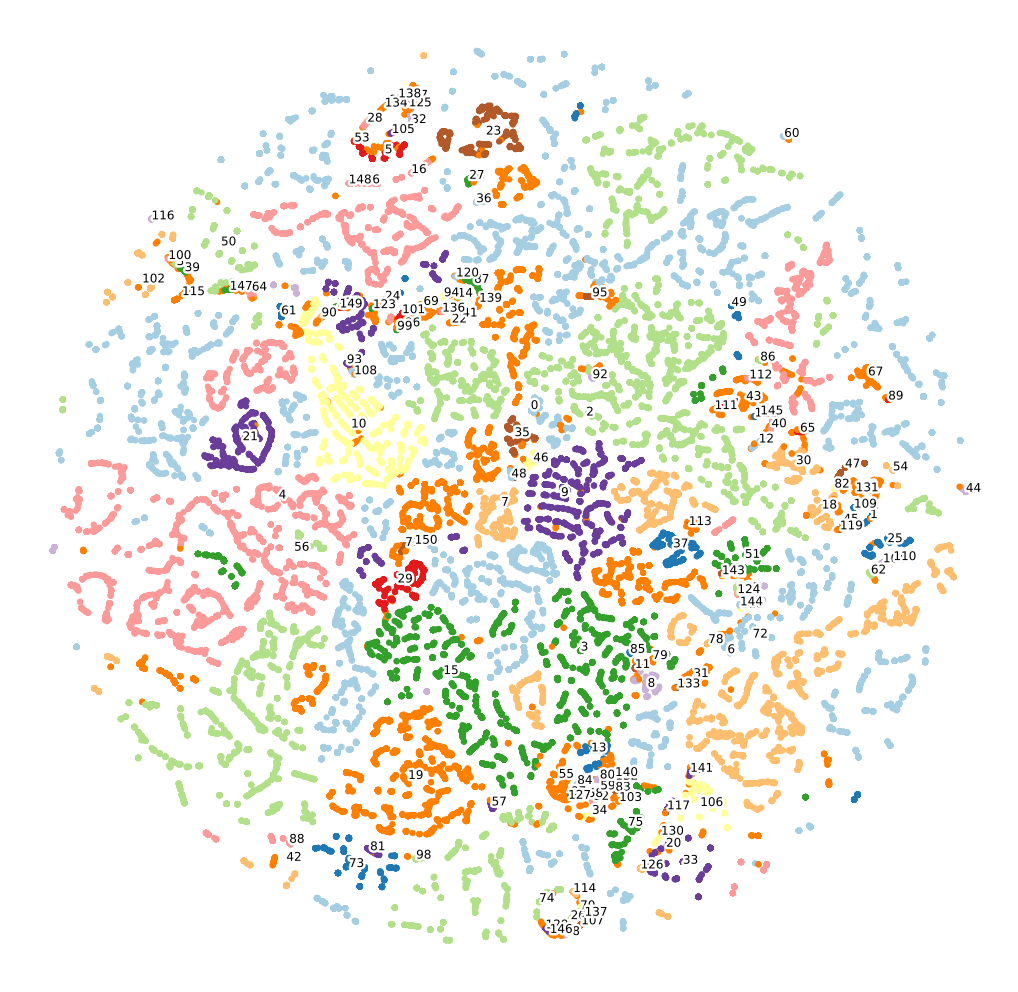

In [288]:
scatter(plot_tsne, y_subset)

(<Figure size 1296x1296 with 1 Axes>,
 <AxesSubplot:>,
 [Text(6.010548, -3.0036316, '0'),
  Text(-17.531712, -17.79679, '1'),
  Text(-8.07515, 10.284084, '2'),
  Text(-20.190277, 2.7681947, '3'),
  Text(20.400173, -25.621912, '4'),
  Text(44.341423, 21.189743, '5'),
  Text(-20.01237, -30.591755, '6'),
  Text(5.9625325, 39.705265, '7'),
  Text(-44.94693, 6.275923, '8'),
  Text(3.4380212, -6.969018, '9'),
  Text(-3.6716657, -21.225182, '10'),
  Text(-27.273745, -1.196425, '11'),
  Text(63.8346, -26.549562, '12'),
  Text(15.823298, -59.759827, '13'),
  Text(68.8004, 16.48351, '14'),
  Text(-36.372784, -23.012215, '15'),
  Text(-46.248383, 11.381927, '16'),
  Text(-56.732853, 13.994595, '17'),
  Text(10.464739, 21.599936, '18'),
  Text(-14.737, 34.98055, '19'),
  Text(-44.88919, 38.116047, '20'),
  Text(28.901943, 7.741951, '21'),
  Text(75.591576, 14.230089, '22'),
  Text(-11.919576, -35.719048, '23'),
  Text(-43.30793, 26.768316, '24'),
  Text(-75.97452, 6.666547, '25'),
  Text(-28.75204

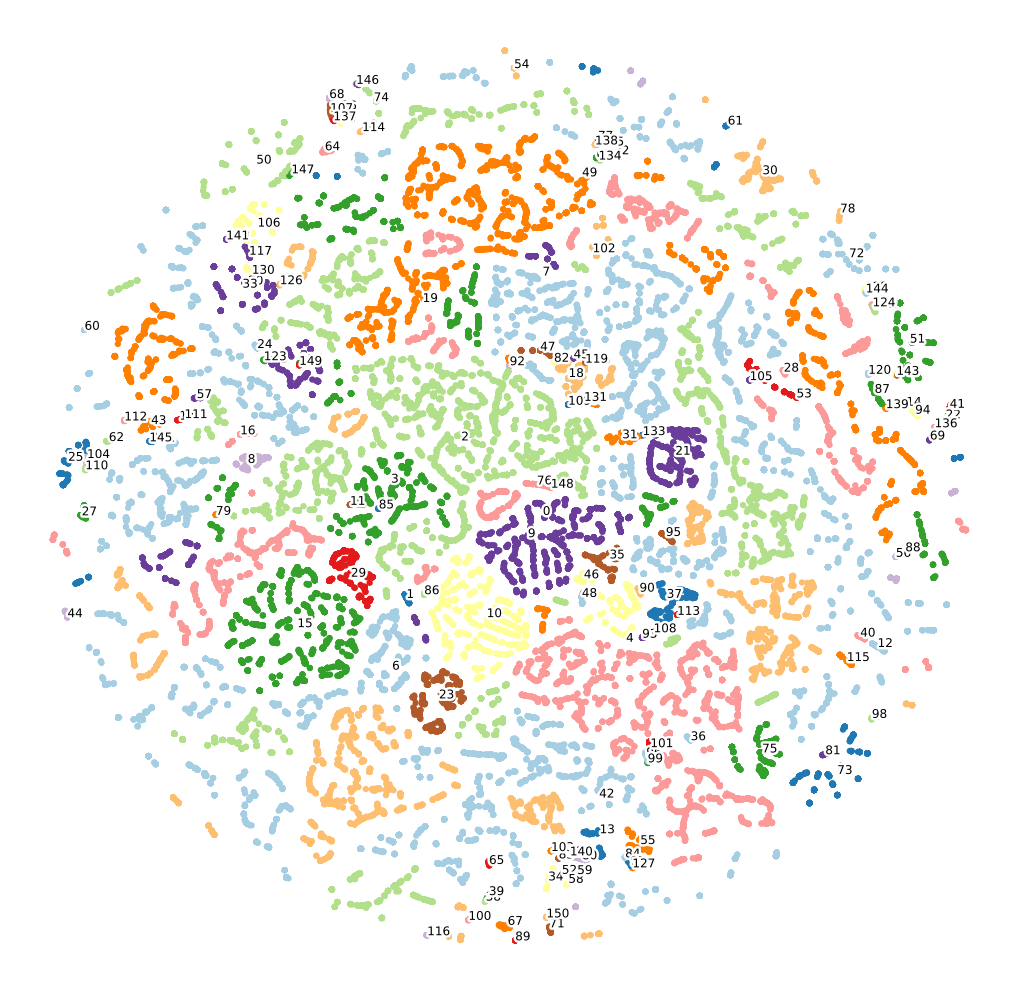

In [289]:
drop = df_clusters[df_clusters['cluster']==-1]

x_subset = X.drop(drop.index)
y_subset = df_clusters['cluster'].drop(drop.index)

clustering = DBSCAN(eps = 0.030, min_samples=10).fit(X)

labels = clustering.labels_

df_clusters = df.copy()
df_clusters['cluster'] = labels

df_clusters['cluster'].value_counts()

plot_tsne = TSNE(random_state=123).fit_transform(x_subset)

scatter(plot_tsne, y_subset)

In [321]:
Y = X[40454:40455]

In [322]:
DBSCAN(eps = 0.030, min_samples=10).fit_predict(Y)

array([-1], dtype=int64)

In [234]:
len(df_clusters[df_clusters['cluster']==-1])

2010

In [236]:
df_clusters[df_clusters['cluster']==0]

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
0,0,49,0,Cargol treu banya,siurana,ESP,"Spain, Cataluña (Catalunya), Provincia de Tarr...","Provincia de Tarragona, Barcelona",41.490003,1.423442,7a,NaN,0
27,27,49,0,geiloexpressen,hjmassevggen,NaN,"Norway, Hordaland fylke, Øygarden, Bergen, Ågo...","Øygarden, Bergen",60.403561,5.018285,7a,NaN,0
38,38,49,0,Horny little devil,lulworth,GBR,"United Kingdom, England, South West, Dorset, B...","South West, Dorset",50.594773,-1.952199,7a,NaN,0
84,85,49,0,l'ecolo net,buis les baronnies,FRA,"France, Auvergne-Rhône-Alpes, Drôme (26), Nyon...","Drôme (26), Nyons",44.355500,5.128380,7a,NaN,0
85,86,49,0,go up,buis les baronnies,FRA,"France, Auvergne-Rhône-Alpes, Drôme (26), Nyon...","Drôme (26), Nyons",44.355500,5.128380,7a,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61791,74300,49,0,Bájate de ahí,la bocandia,ESP,"France, Auvergne-Rhône-Alpes, Haute-Savoie (74...","Haute-Savoie (74), Thonon-les-Bains",46.373130,6.477945,7a,NaN,0
61800,74309,49,0,No name,secret spot,FRA,"Mexico, Estado de Guanajuato, Center, Salamanc...","Center, Salamanca",40.965157,-5.664018,7a,NaN,0
61816,74326,49,0,du baston pour une papà gonfle,sospel,FRA,"France, Provence-Alpes-Côte dAzur, Alpes-Marit...","Alpes-Maritimes (06), Nice",43.700936,7.268391,7a,NaN,0
61817,74328,49,0,move,scex du corbeau,CHE,"France, Nouvelle-Aquitaine, Dordogne (24), Ber...","Dordogne (24), Bergerac",44.800028,0.622551,7a,NaN,0


In [237]:
df_clusters['cluster'].value_counts()


0      3611
7      2835
37     2747
15     2211
17     2096
       ... 
144       5
452       5
112       5
575       5
623       5
Name: cluster, Length: 640, dtype: int64

In [310]:
X[4:5]

,grade_id,climb_type,lat,long
4,0.557143,0.0,0.780122,0.47776


# OPTICS

In [323]:
from sklearn.cluster import OPTICS

In [331]:
clustering = OPTICS(min_samples=5).fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


(<Figure size 1296x1296 with 1 Axes>,
 <AxesSubplot:>,
 [Text(6.010548, -3.0036316, '0'),
  Text(-17.531712, -17.79679, '1'),
  Text(-8.07515, 10.284084, '2'),
  Text(-20.190277, 2.7681947, '3'),
  Text(20.400173, -25.621912, '4'),
  Text(44.341423, 21.189743, '5'),
  Text(-20.01237, -30.591755, '6'),
  Text(5.9625325, 39.705265, '7'),
  Text(-44.94693, 6.275923, '8'),
  Text(3.4380212, -6.969018, '9'),
  Text(-3.6716657, -21.225182, '10'),
  Text(-27.273745, -1.196425, '11'),
  Text(63.8346, -26.549562, '12'),
  Text(15.823298, -59.759827, '13'),
  Text(68.8004, 16.48351, '14'),
  Text(-36.372784, -23.012215, '15'),
  Text(-46.248383, 11.381927, '16'),
  Text(-56.732853, 13.994595, '17'),
  Text(10.464739, 21.599936, '18'),
  Text(-14.737, 34.98055, '19'),
  Text(-44.88919, 38.116047, '20'),
  Text(28.901943, 7.741951, '21'),
  Text(75.591576, 14.230089, '22'),
  Text(-11.919576, -35.719048, '23'),
  Text(-43.30793, 26.768316, '24'),
  Text(-75.97452, 6.666547, '25'),
  Text(-28.75204

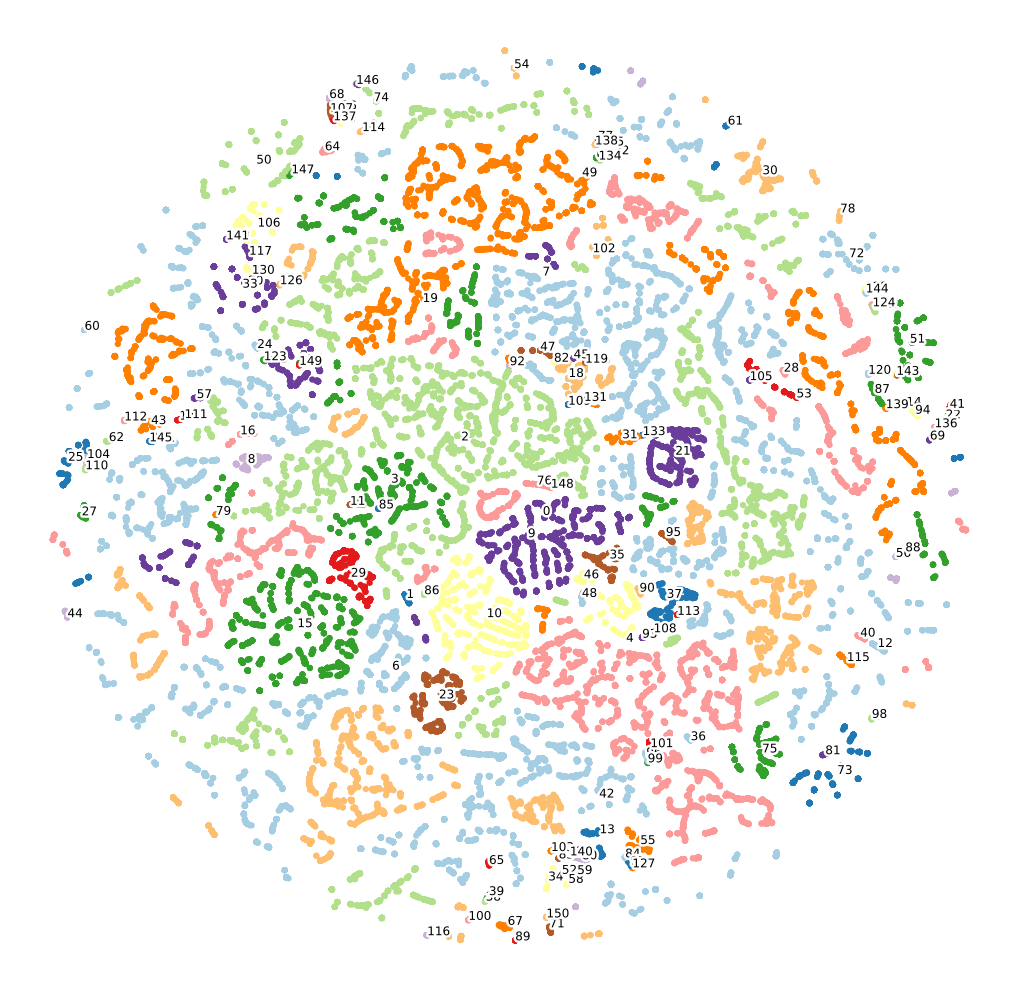

In [332]:
labels = clustering.labels_

df_clusters = df.copy()
df_clusters['cluster'] = labels

df_clusters['cluster'].value_counts()

plot_tsne = TSNE(random_state=123).fit_transform(x_subset)

scatter(plot_tsne, y_subset)

In [333]:
len(df_clusters[df_clusters['cluster']==-1])

8974

In [334]:
df_clusters[df_clusters['cluster']==0]

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
0,0,49,0,Cargol treu banya,siurana,ESP,"Spain, Cataluña (Catalunya), Provincia de Tarr...","Provincia de Tarragona, Barcelona",41.490003,1.423442,7a,NaN,0
4435,4747,49,0,?,(secret),NaN,"Spain, Cataluña (Catalunya), Provincia de Barc...","Provincia de Barcelona, Vic",41.490003,1.423442,7a,NaN,0
5803,6219,49,0,McDevit Route,(secret),NaN,"Spain, Cataluña (Catalunya), Provincia de Barc...","Provincia de Barcelona, Vic",41.490003,1.423442,7a,NaN,0
6030,6456,49,0,Charlie's Thing,(secret),NaN,"Spain, Cataluña (Catalunya), Provincia de Barc...","Provincia de Barcelona, Vic",41.490003,1.423442,7a,NaN,0
6422,6887,49,0,Borg,(secret),NaN,"Spain, Cataluña (Catalunya), Provincia de Barc...","Provincia de Barcelona, Vic",41.490003,1.423442,7a,NaN,0
28253,34079,49,0,Cojon prieto,siurana,ESP,"Spain, Cataluña (Catalunya), Provincia de Tarr...","Provincia de Tarragona, Barcelona",41.490003,1.423442,7a,NaN,0
29415,35599,49,0,Boca seca man,siurana,ESP,"Spain, Cataluña (Catalunya), Provincia de Tarr...","Provincia de Tarragona, Barcelona",41.490003,1.423442,7a,NaN,0
32169,39068,49,0,???,siurana,ESP,"Spain, Cataluña (Catalunya), Provincia de Tarr...","Provincia de Tarragona, Barcelona",41.490003,1.423442,7a,NaN,0
33071,40218,49,0,flican i havanna,odderøya,NOR,"Spain, Cataluña (Catalunya), Provincia de Barc...","Provincia de Barcelona, Vic",41.490003,1.423442,7a,NaN,0
43003,52165,49,0,la bodega,siurana,ESP,"Spain, Cataluña (Catalunya), Provincia de Tarr...","Provincia de Tarragona, Barcelona",41.490003,1.423442,7a,NaN,0


In [336]:
df_clusters[df_clusters['cluster']==4]

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster
15713,17169,49,0,Filar staszla,taterki,NaN,"Andorra, Canillo, SouthWest, Andorra la vella,...","SouthWest, Andorra la vella",42.506939,1.521247,7a,NaN,4
35442,43191,49,0,k t crek,can fil,ESP,"Andorra, Canillo, SouthWest, Andorra la Vella,...","SouthWest, Andorra la Vella",42.506939,1.521247,7a,NaN,4
40346,48971,49,0,Kathleens Nightmare,scout scar,GBR,"Spain, Catalunya, Lleida, Sort, Tornafort.","Lleida, Sort",42.411398,1.129773,7a,NaN,4
41844,50786,49,0,k t crec,can fil,ESP,"Andorra, Canillo, SouthWest, Andorra la Vella,...","SouthWest, Andorra la Vella",42.506939,1.521247,7a,NaN,4
45339,54956,49,0,Taula rasa,sant antoni,AND,"Andorra, La Massana, SouthEast, Andorra la Vel...","SouthEast, Andorra la Vella",42.506939,1.521247,7a,NaN,4
46736,56556,49,0,karpe diem,can fil,ESP,"Andorra, Canillo, SouthWest, Andorra la Vella,...","SouthWest, Andorra la Vella",42.506939,1.521247,7a,NaN,4
48262,58401,49,0,?,can fil,ESP,"Andorra, Canillo, SouthWest, Andorra la Vella,...","SouthWest, Andorra la Vella",42.506939,1.521247,7a,NaN,4
58197,70229,49,0,k t crees,can fil,ESP,"Andorra, Canillo, SouthWest, Andorra la Vella,...","SouthWest, Andorra la Vella",42.506939,1.521247,7a,NaN,4


In [16]:
analisys = (df_clusters['cluster'].value_counts())

In [17]:
for i in analisys:
    print(i)

15133
10432
6944
4082
3321
2832
2628
2627
1968
1695
1695
612
508
469
363
359
349
347
331
327
323
322
315
280
264
240
199
193
163
152
114
104
100
96
92
87
84
78
76
73
66
63
63
60
59
59
56
53
50
46
45
44
44
43
42
42
42
41
40
38
37
36
35
35
34
33
30
27
26
22
22
21
21
21
21
20
20



# TSNE

In [37]:
df_tsne = X.copy()
df_tsne['cluster'] = labels

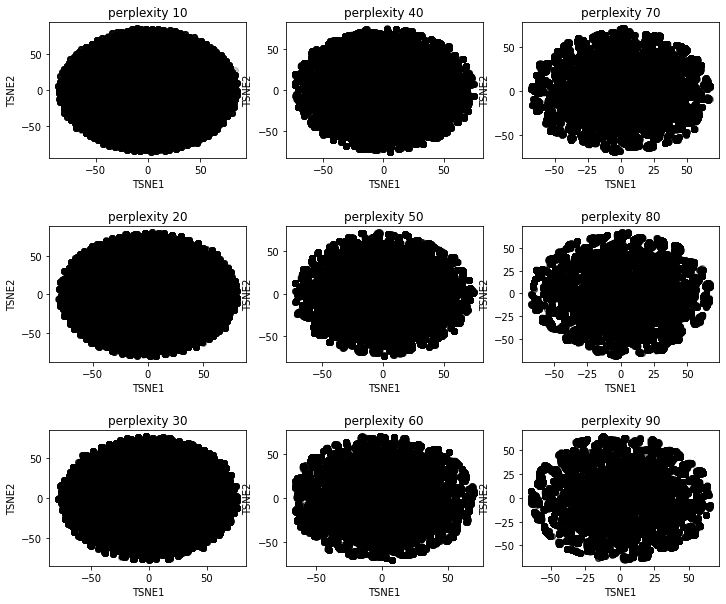

In [59]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
plotX = df_tsne.copy()
ps = [10,20,30,40,50,60,70,80,90]

fig,ax = plt.subplots(3, 3, figsize=(12,10))
plt.subplots_adjust(hspace=.5)
import math 

# the search for ideal perplexity hyperameters...
for i, perplexity in enumerate(ps):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsneComponents = tsne.fit_transform(plotX.drop(["cluster"], axis=1))
    TSNE_components = pd.DataFrame(tsneComponents, index=plotX.index)

    ax[i%3][math.floor(i/3)].set_title(f'perplexity {perplexity}')
    ax[i%3][math.floor(i/3)].scatter(TSNE_components[0], TSNE_components[1], alpha=.2, color='black')
    ax[i%3][math.floor(i/3)].set(xlabel = 'TSNE1')
    ax[i%3][math.floor(i/3)].set(ylabel = 'TSNE2')

# PCA

[Text(0, 0.5, 'PCA3')]

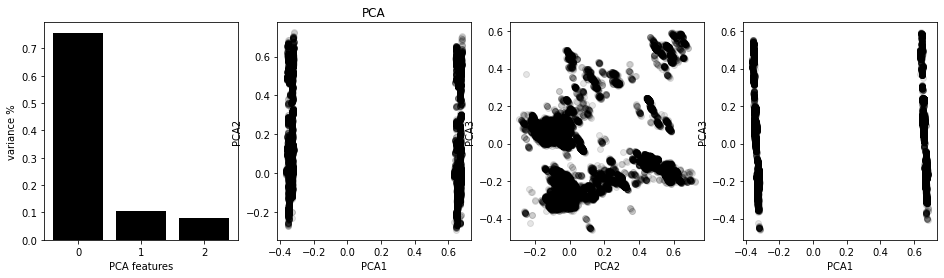

In [60]:
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

plotX = X.copy()

pca = PCA(n_components='mle')
principalComponents = pca.fit_transform(plotX)
PCA_components = pd.DataFrame(principalComponents, index=plotX.index)

# Plot the explained variances
features = range(pca.n_components_)

fig,ax = plt.subplots(1,4, figsize=(16,4))

ax[0].bar(features, pca.explained_variance_ratio_, color='black')
ax[0].set(xlabel = 'PCA features')
ax[0].set(ylabel = 'variance %')
ax[0].set(xticks = features)

ax[1].scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
ax[1].set(xlabel = 'PCA1')
ax[1].set(ylabel = 'PCA2')
ax[1].set(title='PCA')

ax[2].scatter(PCA_components[1], PCA_components[2], alpha=.1, color='black')
ax[2].set(xlabel = 'PCA2')
ax[2].set(ylabel = 'PCA3')

ax[3].scatter(PCA_components[0], PCA_components[2], alpha=.1, color='black')
ax[3].set(xlabel = 'PCA1')
ax[3].set(ylabel = 'PCA3')

In [38]:
plotX = df_tsne.copy()

#  TSNE PERPLEXITY =80

In [39]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=2, perplexity=80)
tsneComponents = tsne.fit_transform(plotX.drop(["cluster"], axis=1))
TSNE_components = pd.DataFrame(tsneComponents, index=plotX.index)

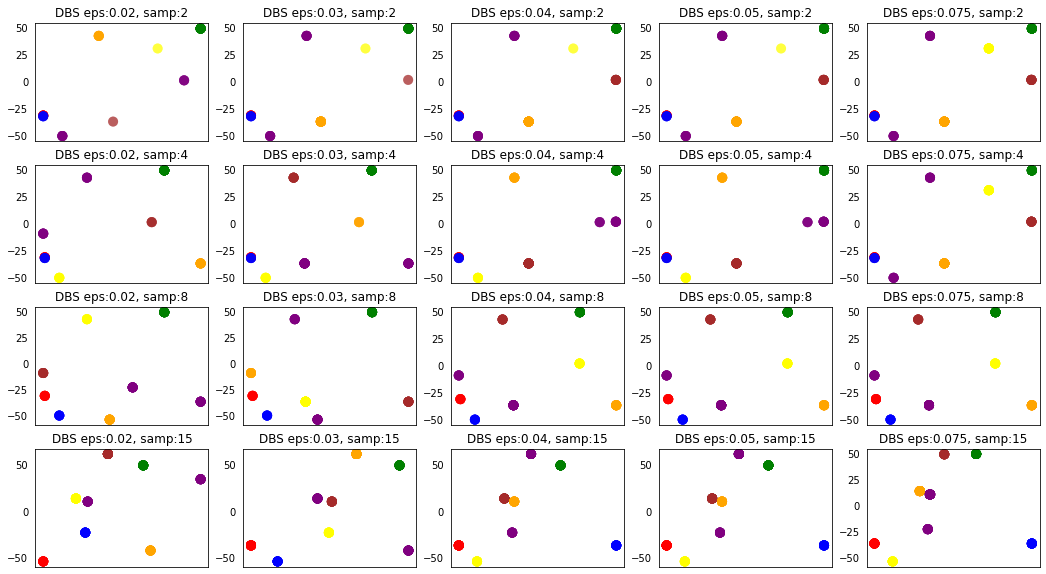

In [40]:
from sklearn.cluster import DBSCAN
import numpy as np
from itertools import product
from math import floor  

samp_list = [2,4,8,15]
eps_list = [0.02, 0.03, 0.04, 0.05, 0.075]
rows = len(samp_list)

fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(18,10))

for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
    ax[k%rows][floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 

    TSNE_df = TSNE_components.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    TSNE_df.insert(0, 'cluster', clustering.labels_)

    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    colors = ('green','red','blue','yellow','purple','brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]

    for data,color,group in zip(datas,colors,groups):
        ax[k%rows][floor(k/rows)].scatter(data[0],data[1], alpha=0.5, c=color, edgecolors='none', s=100, label=group)
        ax[k%rows][floor(k/rows)].set_title(f'DBS eps:{eps}, samp:{samp}')

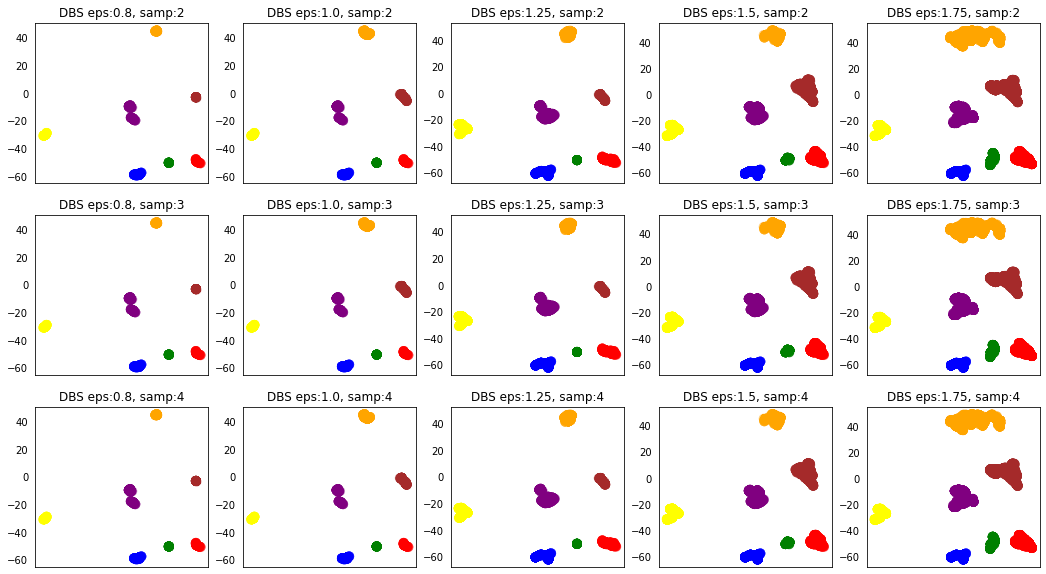

In [25]:
samp_list = [2,3,4]
eps_list = [0.8, 1.0, 1.25, 1.5, 1.75]
rows = len(samp_list)

fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(18,10))

for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
    ax[k%rows][floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 

    TSNE_df = TSNE_components.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    TSNE_df.insert(0, 'cluster', clustering.labels_)

    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    colors = ('green','red','blue','yellow','purple','brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]

    for data,color,group in zip(datas,colors,groups):
        ax[k%rows][floor(k/rows)].scatter(data[0],data[1], alpha=0.5, c=color, edgecolors='none', s=100, label=group)
        ax[k%rows][floor(k/rows)].set_title(f'DBS eps:{eps}, samp:{samp}')

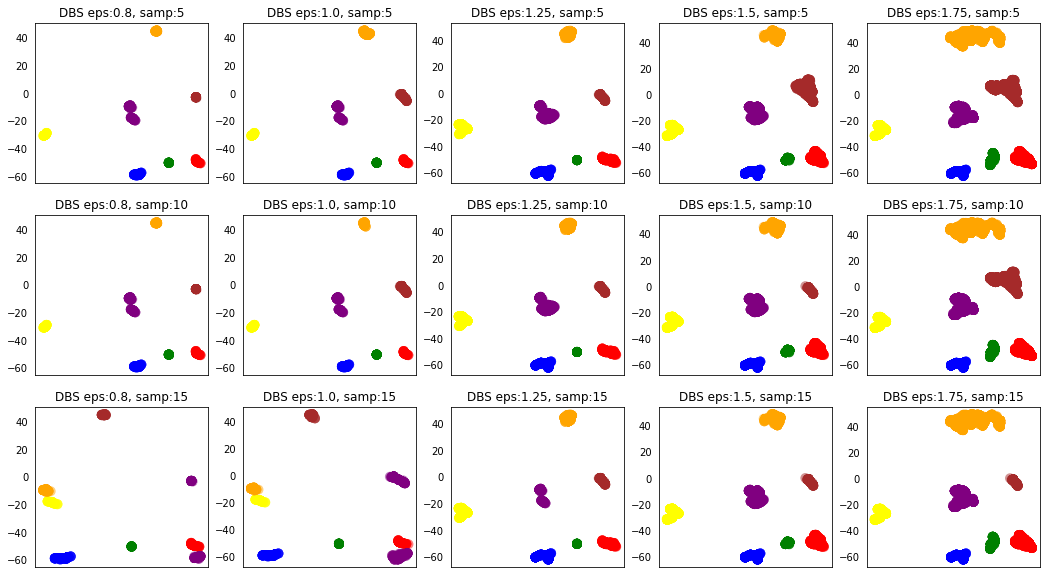

In [26]:
samp_list = [5,10,15]
eps_list = [0.8, 1.0, 1.25, 1.5, 1.75]
rows = len(samp_list)

fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(18,10))

for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
    ax[k%rows][floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 

    TSNE_df = TSNE_components.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    TSNE_df.insert(0, 'cluster', clustering.labels_)

    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    colors = ('green','red','blue','yellow','purple','brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]

    for data,color,group in zip(datas,colors,groups):
        ax[k%rows][floor(k/rows)].scatter(data[0],data[1], alpha=0.5, c=color, edgecolors='none', s=100, label=group)
        ax[k%rows][floor(k/rows)].set_title(f'DBS eps:{eps}, samp:{samp}')

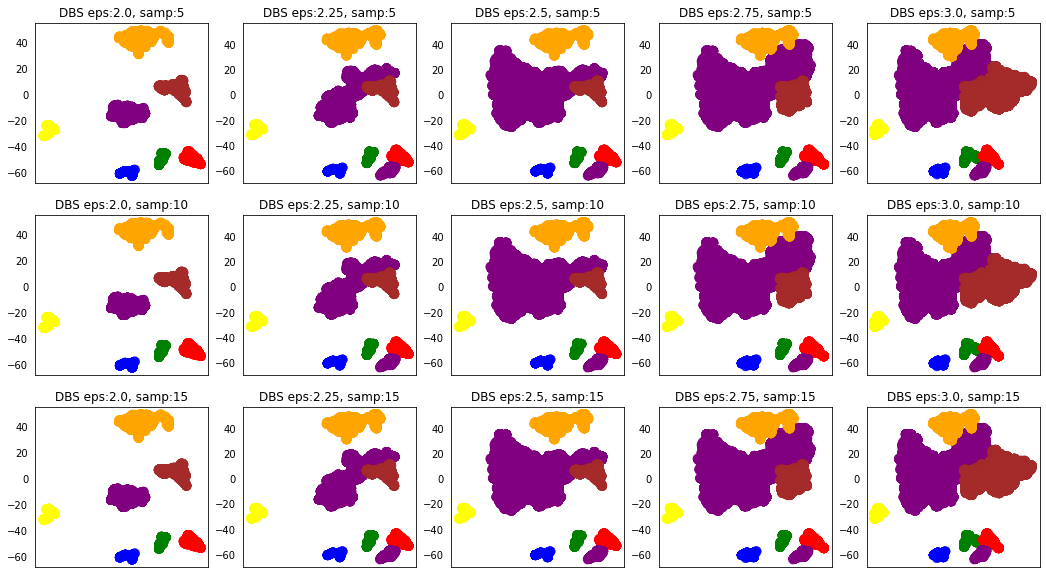

In [27]:
samp_list = [5,10,15]
eps_list = [2.0, 2.25, 2.5, 2.75, 3.0]
rows = len(samp_list)

fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(18,10))

for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
    ax[k%rows][floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 

    TSNE_df = TSNE_components.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    TSNE_df.insert(0, 'cluster', clustering.labels_)

    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    colors = ('green','red','blue','yellow','purple','brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]

    for data,color,group in zip(datas,colors,groups):
        ax[k%rows][floor(k/rows)].scatter(data[0],data[1], alpha=0.5, c=color, edgecolors='none', s=100, label=group)
        ax[k%rows][floor(k/rows)].set_title(f'DBS eps:{eps}, samp:{samp}')

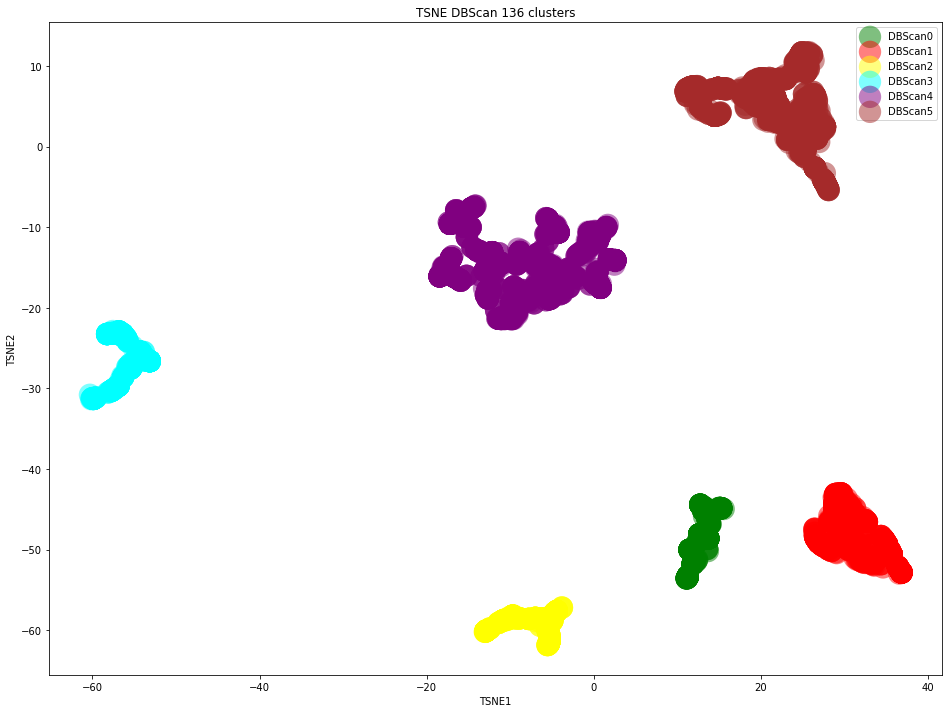

In [33]:
TSNE_df = TSNE_components.copy()
clustering = DBSCAN(eps=2.0, min_samples=15).fit(TSNE_df)
plot_big('DBScan','TSNE',clustering, TSNE_df)

In [32]:
def plot_big(clustering_name, reducer_name, model, df_comp, dims=2):
    df_comp2 = df_comp.copy()
    fig,ax = plt.subplots(figsize=(16,12))

    m = model.fit(df_comp2)  # first 3 cols, or dims
    df_comp2.insert(0, 'cluster', m.labels_)
    
    datas = []
    for i in range(len(set(m.labels_))):
        tup = []
        for j in range(dims):
            tup.append(df_comp2[df_comp2['cluster']==i][j])
        datas.append(tup)

    groups = [clustering_name+str(i) for i in range(len(set(m.labels_)))]
    colors = ('green','red','yellow','cyan','purple','brown')

    for data,color,group in zip(datas,colors,groups):
        x,y = data[0],data[1]
        ax.scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=500, label=group)
        ax.set_title(f'{reducer_name} {clustering_name} {len(set(m.labels_))} clusters')
        ax.set(xlabel=f'{reducer_name}1')
        ax.set(ylabel=f'{reducer_name}2')

    plt.legend(loc=1)
    plt.show()

In [36]:
clustering

DBSCAN(eps=2.0, min_samples=15)

In [29]:
clustering = DBSCAN(eps = 0.075, min_samples=15).fit(X)

In [30]:
labels = clustering.labels_

In [31]:
df_clusters = df.copy()
df_clusters['cluster'] = labels

In [32]:
df_clusters['cluster'].value_counts()

 0     31538
 3     12515
 5      7515
 2      7159
 1       657
 7       438
 4       422
 17      352
 8       320
-1       295
 12      182
 6        89
 10       75
 15       56
 11       52
 13       36
 9        33
 14       22
 20       18
 21       15
 16       15
 18       15
 19       15
Name: cluster, dtype: int64

In [33]:
df_clusters[df_clusters['cluster']==30].head(50)

,index,grade_id,climb_type,name,crag,country,location,city,lat,long,grade_route,grade_boulder,cluster


In [34]:
analisys = (df_clusters['cluster'].value_counts())

In [35]:
for i in analisys:
    print(i)

31538
12515
7515
7159
657
438
422
352
320
295
182
89
75
56
52
36
33
22
18
15
15
15
15


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
from itertools import product
from math import floor  

samp_list = [2,4,8,15]
eps_list = [0.02, 0.03, 0.04, 0.05, 0.075]
rows = len(samp_list)

fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(18,10))

for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
    ax[k%rows][floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 

    TSNE_df = TSNE_components.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    TSNE_df.insert(0, 'cluster', clustering.labels_)

    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    groups = [str(i) for i in range(len(set(clustering.labels_)))]

    for data,group in zip(datas,groups):
        ax[k%rows][floor(k/rows)].scatter(data[0],data[1], alpha=0.5, edgecolors='none', s=100, label=group)
        ax[k%rows][floor(k/rows)].set_title(f'DBS eps:{eps}, samp:{samp}')